Parsing html of suumo (odawara rental)

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

url = "https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=14&sc=14206&cb=0.0&ct=9999999&mb=0&mt=9999999&et=9999999&cn=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&sngz=&po1=25&pc=50&page=1"

html_content = requests.get(url).text

soup = bs(html_content, 'html.parser')

# Find all parent elements with class 'cassetteitem_price cassetteitem_price--rent'
parent_elements = soup.find_all('span', class_='cassetteitem_price cassetteitem_price--rent')

# Extract child elements with the specific class within the parent
prices = []
for parent in parent_elements:
    price = parent.find('span', class_='cassetteitem_other-emphasis ui-text--bold')
    if price:
        price = float(price.text.replace("万円", "")) * 10000
        prices.append(price)


Data summary

In [37]:
print("Listing count: ", len(prices))
print("Average price: ", int(sum(prices) / len(prices)), "円")


Listing count:  86
Average price:  60831 円


Data processing

In [ ]:
data = {}

for price in prices:
    data[str(price)] = data.get(str(price), 0) + 1
    
print(data)

Data Visualization

<BarContainer object of 36 artists>

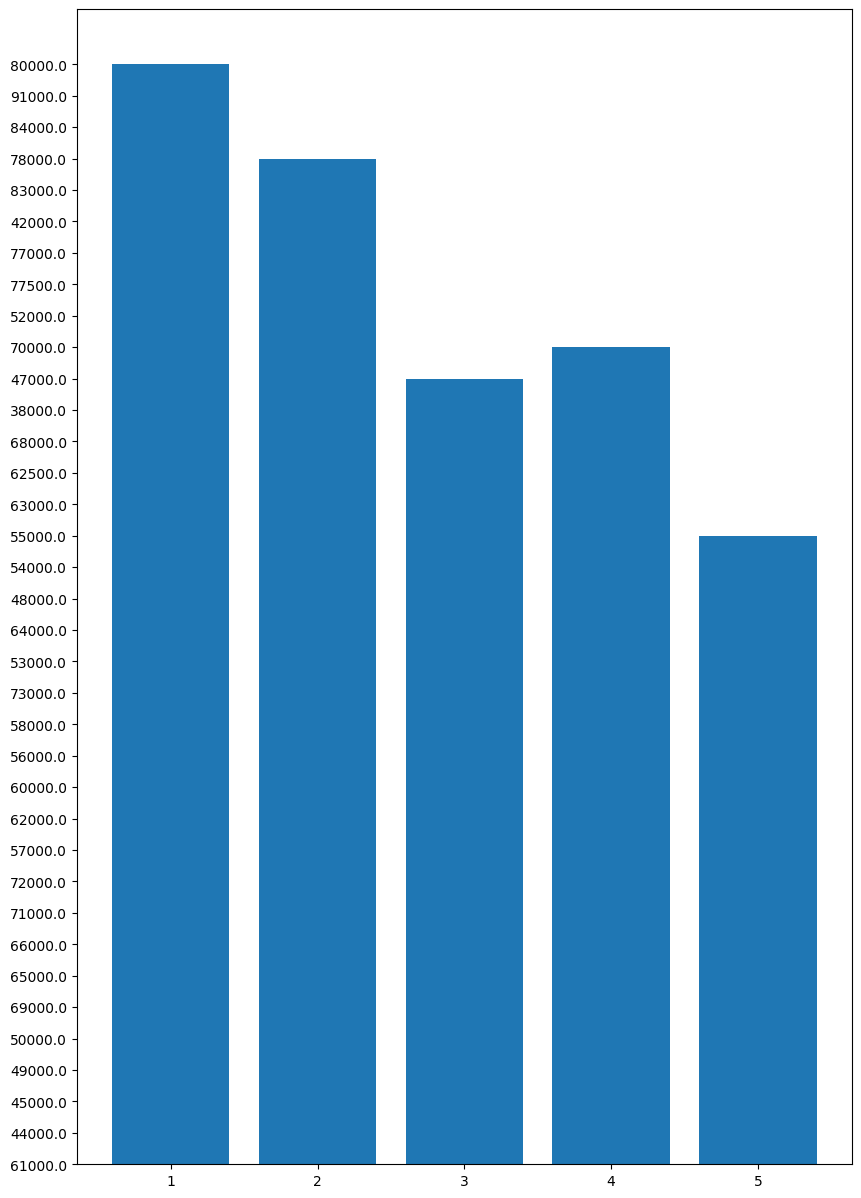

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
plt.bar(data.values(), data.keys())